# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
# your code here
def roll_dice(num_rolls=10):
 
    rolls = [random.choice(range(1, 7)) for _ in range(num_rolls)]
    
   
    df = pd.DataFrame({'Roll': range(1, num_rolls+1),
                       'Result': rolls})
    
    return df


dice_rolls_df = roll_dice()
dice_rolls_df

,Roll,Result
0,1,4
1,2,5
2,3,6
3,4,3
4,5,1
5,6,3
6,7,3
7,8,6
8,9,4
9,10,2


#### 2.- Plot the results sorted by value.

/Users/nataliavargas/miniconda3/envs/m2_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nataliavargas/miniconda3/envs/m2_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nataliavargas/miniconda3/envs/m2_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


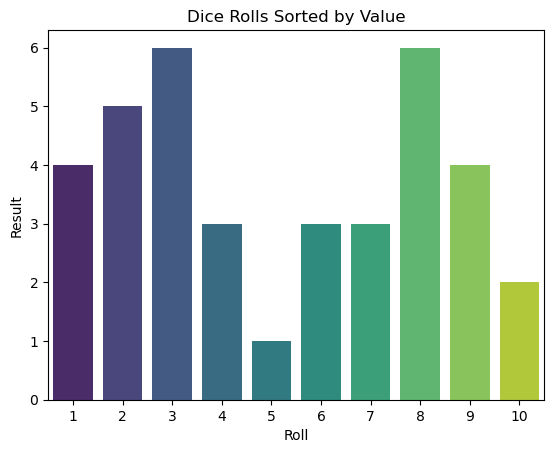

In [5]:
# your code here

sorted_df = dice_rolls_df.sort_values(by='Result')


sns.barplot(x='Roll', y='Result', data=sorted_df, palette='viridis')
plt.xlabel('Roll')
plt.ylabel('Result')
plt.title('Dice Rolls Sorted by Value')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

/Users/nataliavargas/miniconda3/envs/m2_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nataliavargas/miniconda3/envs/m2_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nataliavargas/miniconda3/envs/m2_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


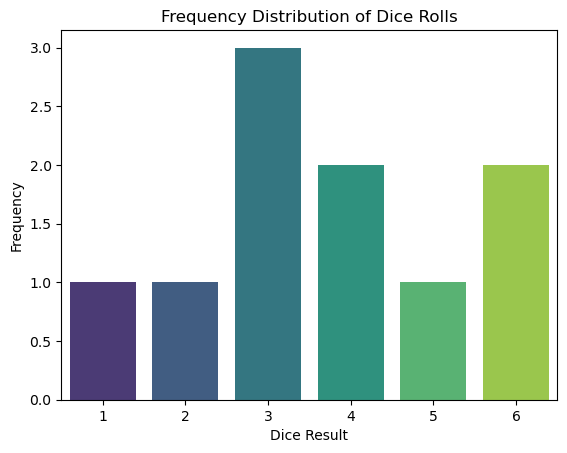

In [6]:
# your code here
frequency_distribution = dice_rolls_df['Result'].value_counts().sort_index()


sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, palette='viridis')
plt.xlabel('Dice Result')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Rolls')
plt.show()

In [ ]:
"""
your comments here
"""
In this plot, the x-axis represents the possible outcomes of rolling a dice (1 to 6), and the y-axis represents the frequency of each outcome. Each bar represents the frequency of a particular dice roll result.

The relationship between this plot and the previous one is that they both represent the distribution of the dice rolls. However, while the first plot sorted the rolls by their value and displayed each individual roll separately, this plot aggregates the data to show the frequency of each possible roll outcome. In other words, the first plot shows the individual results of each roll, while the second plot shows how many times each result occurred in the set of rolls.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def calculate_mean(data):
    total_sum = 0
    total_count = 0
    
    for observation in data:
        total_sum += observation
        total_count += 1
    
    mean = total_sum / total_count
    return mean

# Example usage with your dice results
dice_results = [3, 6, 1, 5, 2, 4, 3, 6, 1, 2]  # Example dice results from challenge 1
mean = calculate_mean(dice_results)
mean

3.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
def calculate_mean_from_frequency_distribution(frequency_distribution):
    total_sum = 0
    total_count = 0
    
    for value, frequency in frequency_distribution.items():
        total_sum += value * frequency
        total_count += frequency
    
    mean = total_sum / total_count
    return mean


frequency_distribution = {1: 2, 2: 2, 3: 2, 4: 1, 5: 1, 6: 2} 
mean = calculate_mean_from_frequency_distribution(frequency_distribution)
mean

3.3

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    if n % 2 == 0:
        # If the number of observations is even
        middle_right = n // 2
        middle_left = middle_right - 1
        median = (sorted_data[middle_left] + sorted_data[middle_right]) / 2
    else:
        # If the number of observations is odd
        middle_index = n // 2
        median = sorted_data[middle_index]
    
    return median

dice_results = [3, 6, 1, 5, 2, 4, 3, 6, 1, 2]  # Example dice results from challenge 1
median = calculate_median(dice_results)
median

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here
def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    # Calculate the median (Q2)
    if n % 2 == 0:
        middle_right = n // 2
        middle_left = middle_right - 1
        Q2 = (sorted_data[middle_left] + sorted_data[middle_right]) / 2
    else:
        middle_index = n // 2
        Q2 = sorted_data[middle_index]
    
    # Calculate the first quartile (Q1)
    lower_half = sorted_data[:middle_index] if n % 2 != 0 else sorted_data[:middle_left + 1]
    Q1 = calculate_median(lower_half)
    
    # Calculate the third quartile (Q3)
    upper_half = sorted_data[middle_index + 1:] if n % 2 != 0 else sorted_data[middle_right + 1:]
    Q3 = calculate_median(upper_half)
    
    return Q1, Q2, Q3

# Example usage with your dice results
dice_results = [3, 6, 1, 5, 2, 4, 3, 6, 1, 2]  # Example dice results from challenge 1
Q1, Q2, Q3 = calculate_quartiles(dice_results)
print("First Quartile (Q1):", Q1)
print("Median (Q2):", Q2)
print("Third Quartile (Q3):", Q3)


First Quartile (Q1): 2
Median (Q2): 3.0
Third Quartile (Q3): 5.5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [13]:
# your code here
data = pd.read_csv("../data/roll_the_dice_hundred.csv")
data

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


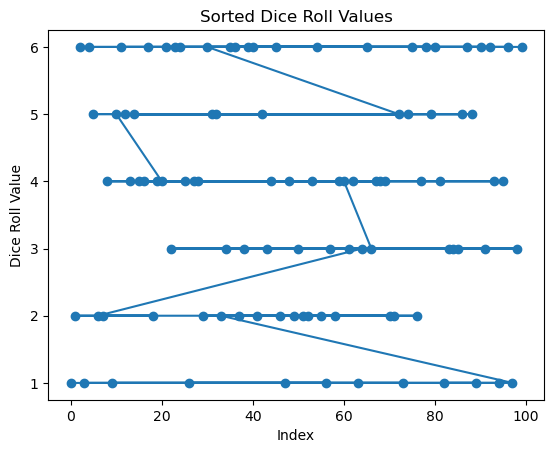

In [14]:
sorted_values = data['value'].sort_values()

# Plot the sorted values
plt.plot(sorted_values, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Dice Roll Value')
plt.title('Sorted Dice Roll Values')
plt.show()

In [ ]:
"""
your comments here
"""
you should see a line plot where the x-axis represents the index of the sorted values (from 0 to 99) and the y-axis represents the sorted dice roll values. Depending on the distribution of the dice rolls, you may observe certain patterns or trends in the plot.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [15]:
# your code here
def calculate_mean(data):
    total_sum = 0
    total_count = 0
    
    for observation in data:
        total_sum += observation
        total_count += 1
    
    mean = total_sum / total_count
    return mean

# Calculate the mean value of the hundred dice rolls
mean_value = calculate_mean(data['value'])
mean_value

3.74

#### 3.- Now, calculate the frequency distribution.


In [16]:
# your code here
frequency_distribution = data['value'].value_counts().sort_index()
frequency_distribution

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: count, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

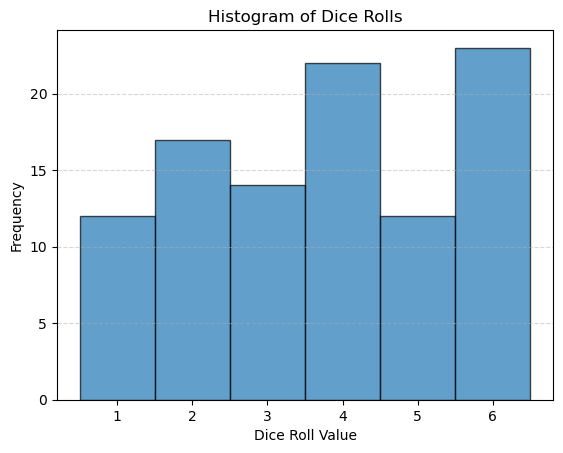

In [17]:
# your code here
plt.hist(data['value'], bins=range(1, 8), align='left', edgecolor='black', alpha=0.7)
plt.xlabel('Dice Roll Value')
plt.ylabel('Frequency')
plt.title('Histogram of Dice Rolls')
plt.xticks(range(1, 7))  
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.show()

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [21]:
# your code here
df = pd.read_csv("../data/roll_the_dice_thousand.csv")
df

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


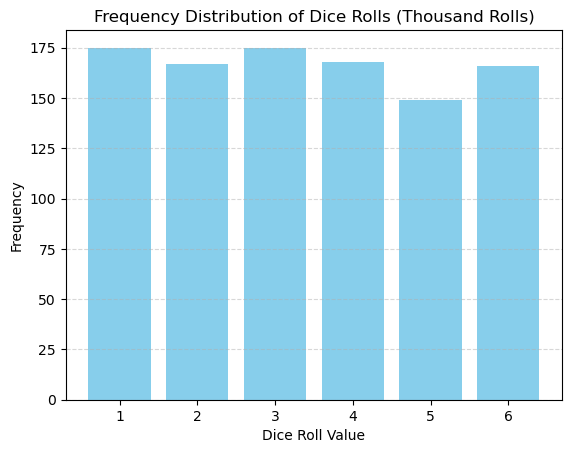

In [22]:
frequency_distribution_thousand = df['value'].value_counts().sort_index()

# Plot the frequency distribution
plt.bar(frequency_distribution_thousand.index, frequency_distribution_thousand.values, color='skyblue')
plt.xlabel('Dice Roll Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Rolls (Thousand Rolls)')
plt.xticks(range(1, 7))  # Setting x-axis ticks to dice face values
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding horizontal grid lines
plt.show()


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [24]:
# your code here
ages = pd.read_csv("../data/ages_population.csv")
ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [26]:
frequency_distribution_ages = ages['observation'].value_counts().sort_index()
frequency_distribution_ages

observation
1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: count, Length: 72, dtype: int64

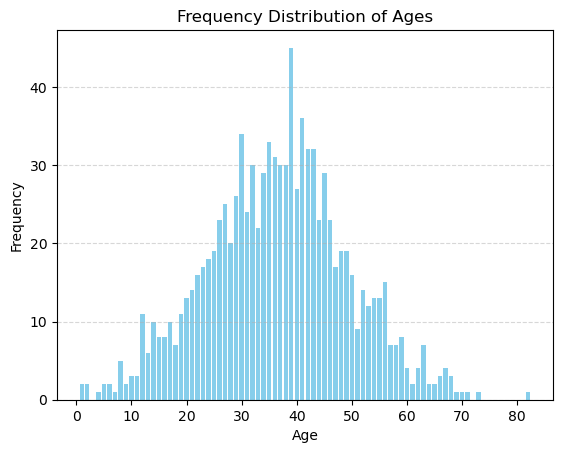

In [27]:
plt.bar(frequency_distribution_ages.index, frequency_distribution_ages.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding horizontal grid lines
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [29]:
# your code here
mean_age = ages['observation'].mean()
std_dev_age = ages['observation'].std()

mean_age

36.56

In [30]:
std_dev_age

12.816499625976762

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [31]:
# your code here
ages2 = pd.read_csv("../data/ages_population2.csv")
ages2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


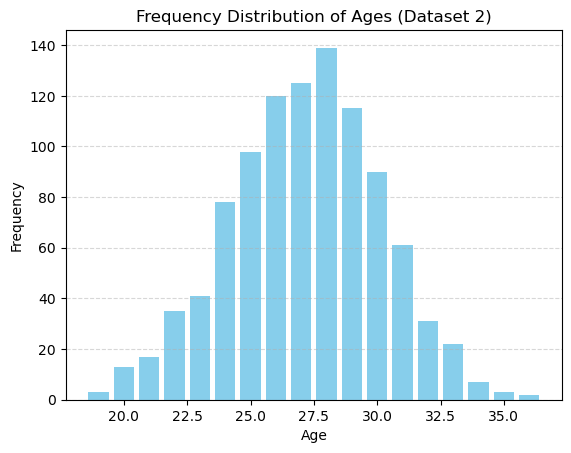

In [32]:
frequency_distribution_ages2 = ages2['observation'].value_counts().sort_index()

# Plot the frequency distribution
plt.bar(frequency_distribution_ages2.index, frequency_distribution_ages2.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages (Dataset 2)')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding horizontal grid lines
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""
Shape of the Distribution: The shape of the frequency distribution plot in step 4 might be different from step 1. It could have a different distribution pattern, such as being more skewed to one side or having multiple peaks, depending on the data.

Range of Ages: The range of ages and their frequencies might vary between the two datasets. This could result in differences in the height and spread of the bars in the frequency distribution plot.

Overall Pattern: There could be differences in the overall pattern of the frequency distribution, such as the presence of outliers, different central tendencies, or variations in the spread of ages.

To precisely compare the differences between the two frequency distributions, we would need to perform further analysis, such as calculating summary statistics (mean, median, standard deviation) and visually inspecting the distributions. Additionally, statistical tests could be applied to determine if the differences are statistically significant.







#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [35]:
# your code here
mean_age_2 = ages2['observation'].mean()
std_dev_age_2 = ages2['observation'].std()

print("Mean age for ages_population2.csv:", mean_age_2)
print("Standard deviation of age for ages_population2.csv:", std_dev_age_2)


Mean age for ages_population2.csv: 27.155
Standard deviation of age for ages_population2.csv: 2.969813932689186


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [36]:
# your code here
ages3 = pd.read_csv("../data/ages_population3.csv")
ages3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


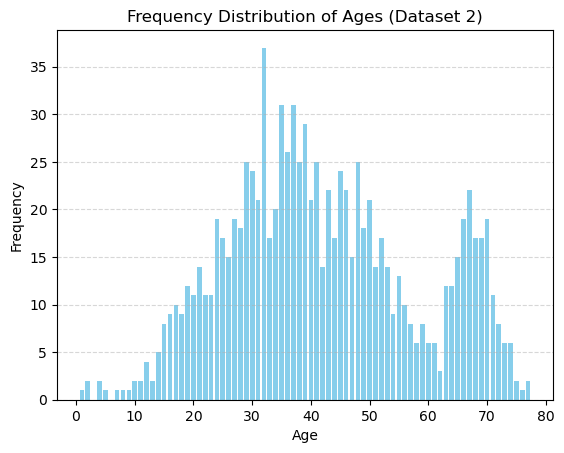

In [38]:
frequency_distribution_ages3 = ages3['observation'].value_counts().sort_index()

# Plot the frequency distribution
plt.bar(frequency_distribution_ages3.index, frequency_distribution_ages3.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages (Dataset 2)')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding horizontal grid lines
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [39]:
# your code here
mean_age_3 = ages3['observation'].mean()
std_dev_age_3 = ages3['observation'].std()

print("Mean age for ages_population2.csv:", mean_age_3)
print("Standard deviation of age for ages_population2.csv:", std_dev_age_3)


Mean age for ages_population2.csv: 41.989
Standard deviation of age for ages_population2.csv: 16.144705959865934


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [41]:
# your code here
def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    # Calculate the median (Q2)
    if n % 2 == 0:
        middle_right = n // 2
        middle_left = middle_right - 1
        Q2 = (sorted_data[middle_left] + sorted_data[middle_right]) / 2
    else:
        middle_index = n // 2
        Q2 = sorted_data[middle_index]
    
    # Calculate the first quartile (Q1)
    lower_half = sorted_data[:middle_index] if n % 2 != 0 else sorted_data[:middle_left + 1]
    Q1 = calculate_median(lower_half)
    
    # Calculate the third quartile (Q3)
    upper_half = sorted_data[middle_index + 1:] if n % 2 != 0 else sorted_data[middle_right + 1:]
    Q3 = calculate_median(upper_half)
    
    return Q1, Q2, Q3

# Calculate quartiles for ages_population3.csv
Q1, Q2, Q3 = calculate_quartiles(ages3['observation'])

print("First Quartile (Q1):", Q1)
print("Median (Q2):", Q2)
print("Third Quartile (Q3):", Q3)

First Quartile (Q1): 30.0
Median (Q2): 40.0
Third Quartile (Q3): 53.0


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [43]:
# your code here
percentiles = [0.1, 0.25, 0.75, 0.9]

additional_percentiles = ages3['observation'].quantile(percentiles)

for p, percentile in zip(percentiles, additional_percentiles):
    print(f"{p*100}th Percentile:", percentile)

10.0th Percentile: 22.0
25.0th Percentile: 30.0
75.0th Percentile: 53.0
90.0th Percentile: 67.0


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""